In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('veteran(5).csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TargetB           9686 non-null   int64  
 1   ID                9686 non-null   int64  
 2   TargetD           4843 non-null   float64
 3   GiftCnt36         9686 non-null   int64  
 4   GiftCntAll        9686 non-null   int64  
 5   GiftCntCard36     9686 non-null   int64  
 6   GiftCntCardAll    9686 non-null   int64  
 7   GiftAvgLast       9686 non-null   float64
 8   GiftAvg36         9686 non-null   float64
 9   GiftAvgAll        9686 non-null   float64
 10  GiftAvgCard36     7906 non-null   float64
 11  GiftTimeLast      9686 non-null   int64  
 12  GiftTimeFirst     9686 non-null   int64  
 13  PromCnt12         9686 non-null   int64  
 14  PromCnt36         9686 non-null   int64  
 15  PromCntAll        9686 non-null   int64  
 16  PromCntCard12     9686 non-null   int64  


In [3]:
#describe key statistics from DemAge column
print(df['DemAge'].describe())

count    7279.000000
mean       59.150845
std        16.516400
min         0.000000
25%        47.000000
50%        60.000000
75%        73.000000
max        87.000000
Name: DemAge, dtype: float64


In [4]:
#unique values in DemAge
print(df['DemAge'].unique())

[nan 67. 53. 47. 58. 39. 50. 45. 80. 61. 76. 41. 75. 59. 51. 31. 54. 70.
 42. 65. 81. 38. 56. 69. 52. 33. 73. 71. 29. 60. 83. 43. 35. 77. 44. 72.
 64. 34. 55. 37. 57. 46. 49. 32. 66. 87. 40. 79. 25. 63. 62. 48. 68. 86.
 23. 27. 74. 78. 85. 26.  7. 36. 82. 24. 17. 30. 84. 21. 28. 22. 19. 16.
 14.  6.  0.  2. 20. 18. 15.  4.]


In [5]:
#print number of occurences for each unique values in DemAge
print(df['DemAge'].value_counts())

73.0    216
67.0    215
75.0    203
49.0    201
57.0    187
       ... 
2.0       1
20.0      1
4.0       1
18.0      1
15.0      1
Name: DemAge, Length: 79, dtype: int64


In [6]:
#Similar with above, but binned into 10 range bins for easier interpretation
print(df['DemAge'].value_counts(bins=10))

(69.6, 78.3]     1437
(60.9, 69.6]     1250
(43.5, 52.2]     1223
(52.2, 60.9]     1043
(78.3, 87.0]      932
(34.8, 43.5]      889
(26.1, 34.8]      342
(17.4, 26.1]       72
(8.7, 17.4]        53
(-0.088, 8.7]      38
Name: DemAge, dtype: int64


In [7]:
#get the average age of donors, goruped by their lapsing information
print(df.groupby(['TargetB'])['DemAge'].mean())

TargetB
0    58.304444
1    59.979070
Name: DemAge, dtype: float64


In [8]:
#get the value count of each gender
print("Raw count of genders of lapsing and non-lapsing donors")
print(df.groupby(['TargetB'])['DemGender'].value_counts())

print("---------------------------------------------------------")
#add normalisation to get the relative frequency
print("Normalised count (percenteage) of genders of lapsing and non-lapsing donors")
print(df.groupby(['TargetB'])['DemGender'].value_counts(normalize=True))

Raw count of genders of lapsing and non-lapsing donors
TargetB  DemGender
0        F            2614
         M            1963
         U             266
1        F            2609
         M            1962
         U             272
Name: DemGender, dtype: int64
---------------------------------------------------------
Normalised count (percenteage) of genders of lapsing and non-lapsing donors
TargetB  DemGender
0        F            0.539748
         M            0.405327
         U            0.054925
1        F            0.538716
         M            0.405121
         U            0.056164
Name: DemGender, dtype: float64


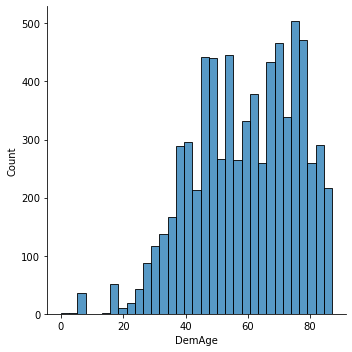

In [9]:
#To igonre any future warinings
import warnings
warnings.filterwarnings("ignore")

#dropna is used beacuse 'DemAge' as ,ossomg va;ies
dg = sns.displot(df['DemAge'].dropna())
plt.show()

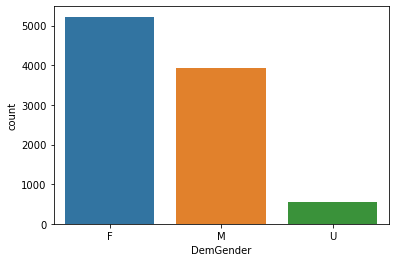

In [10]:
dg = sns.countplot(data=df, x= 'DemGender')
plt.show()

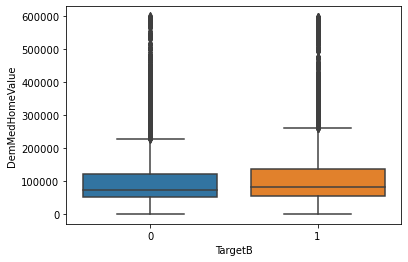

In [11]:
ax = sns.boxplot(x="TargetB", y="DemMedHomeValue", data = df)
plt.show()

In [12]:
#Change DemCluster form interval/interger to nominal/str
df['DemCluster'] = df['DemCluster'].astype(str)

In [13]:
#to check if it work or not
#print(df['DemCluster'].describe())

In [14]:
df['DemHomeOwner'].value_counts()

H    5377
U    4309
Name: DemHomeOwner, dtype: int64

In [15]:
#Change DemHomeOnwer into binary 0/1 varibale
dem_home_onwer_map = {'U':0, 'H':1}
df['DemHomeOnwer'] = df['DemHomeOwner'].map(dem_home_onwer_map)
#to check if it work or not
#print(df['DemHomeOwner'].describe())

In [16]:
df['DemMedIncome'].value_counts()

0        2357
43100      10
46250       8
72339       8
48772       8
         ... 
40080       1
29464       1
51999       1
72485       1
41000       1
Name: DemMedIncome, Length: 4463, dtype: int64

In [17]:
#denote errorneous values in DemMidIncome
mask = df['DemMedIncome'] <1

In [18]:
import numpy as np 
df.loc[mask, 'DemMedIncome'] = np.nan

In [19]:
#input missing values in DemAge with tis mean
df['DemAge'].fillna(df['DemAge'].mean(), inplace = True)

In [20]:
#input med income using mean
df['DemMedIncome'].fillna(df['DemMedIncome'].mean(), inplace = True)

In [21]:
#input gift avg card 36 using mean
df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace = True)

In [22]:
df.drop(['ID','TargetD'], axis =1, inplace = True)

In [23]:
#for gender, before one hot encoding.. head() is used to display first 5 records.
print(df['DemGender'].head(5))

0    F
1    F
2    M
3    M
4    M
Name: DemGender, dtype: object


In [24]:
#after one hot encoding
demo_df = pd.get_dummies(df['DemGender'])
demo_df.head(5)

,F,M,U
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [25]:
#one hoe encoding all categorical varibles
#all numerical varibales are automatically excluded
#number of clumns after the conversion should increase singificantly
print("Before:", len(df.columns))

#one hot encoding
df = pd.get_dummies(df)

print("After:", len(df.columns))

Before: 27
After: 88


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 88 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TargetB           9686 non-null   int64  
 1   GiftCnt36         9686 non-null   int64  
 2   GiftCntAll        9686 non-null   int64  
 3   GiftCntCard36     9686 non-null   int64  
 4   GiftCntCardAll    9686 non-null   int64  
 5   GiftAvgLast       9686 non-null   float64
 6   GiftAvg36         9686 non-null   float64
 7   GiftAvgAll        9686 non-null   float64
 8   GiftAvgCard36     9686 non-null   float64
 9   GiftTimeLast      9686 non-null   int64  
 10  GiftTimeFirst     9686 non-null   int64  
 11  PromCnt12         9686 non-null   int64  
 12  PromCnt36         9686 non-null   int64  
 13  PromCntAll        9686 non-null   int64  
 14  PromCntCard12     9686 non-null   int64  
 15  PromCntCard36     9686 non-null   int64  
 16  PromCntCardAll    9686 non-null   int64  


In [ ]:
#dm_tools.py
import numpy as np
import pandas as pd

def data_prep():
    #read the veteran dataset
    df = pd.read_csv('veteran.csv')
    
    #change DemCluster from interval/integer to nominal/str
    df['DemCluster'] = df['DemCluster'].astype(str)
    
    #change DemHomeOnwer into binary 0/1 varibale
    dem_home_onwer_map = {'U':0, 'H':1}
    df['DemHomeOnwer'] = df['DemHomeOnwer'].map(dem_home_onwer_map)
    
    #denote errorneous values in DemMidIncome
    mask = df['DemMedIncome'] <1
    df.loc[mask, 'DemMedIncome'] = np.nan
    
    #imput missing values in DemAge with its mean
    df['DemAge'].fillna(df['DemAge'].mean(), inplace=True)
    
    #input med income using mean
    df['DemMedIncome'].fillna(df['DemMendIncome'].mean(), inplace = True)
    
    #input gift avg card 36 using mean
    df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace = True)
    
    #drop ID and the unsused target varibles
    df.drop(['ID','TargetD'], axis =1, inplace = True)
    
    df = pd.get_dummies(df)
    
    return df

In [ ]:
#below is the questions form week2

In [ ]:
import numpy as np 
df = pd.read_csv('melbourne_house_price(1).csv',index_col=0)
print(df.info())

In [ ]:
print(df['Rooms'].describe())
#mean is 2.98
#median is 3

In [ ]:
print(df['Distance'].value_counts(bins=10))
#How many houses are in each bin

In [ ]:
print(df['Method'].unique())
#5

In [ ]:
#4. Corrlat ion between property type and priceabove median
df.groupby(['Type'])['Price_above_median'].value_counts()

In [ ]:
dg = sns.displot(df['Distance'].dropna())
plt.show()

In [ ]:
#distribution plot for the catgorical column of "Type"
dg1 = sns.countplot(data = df, x='Type')
plt.show()

In [ ]:
#distribution plot of rooms, goruped by property type
dg2 = sns.boxplot(x='Type',y='Rooms', data = df)
plt.show()

Correctring errors in data
By performing data exploration, grouping and plotting, what problems have you revealed with the dataset?

